In [16]:
import xlrd
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rc('font',family='NanumGothic')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy

In [17]:
train_data=pd.read_excel('dataset1.xlsx',sheet_name = 'Sheet2')

In [18]:
train_data.shape

(300, 12)

In [19]:
train_data[0:300:15]

,질병,질병 수,나이,성별,거주지,팔로워,팔로잉,서포트,가입일자,마지막일자,활동기간,활동주기(빈도)
0,ALS,2,21,M,"NY, US",0,0,0,2019-05-02 00:00:00,2020-02-07 00:00:00,281,5
15,ALS,7,56,M,"OK,US",20,16,8,2017-11-30 00:00:00,2020-10-29 00:00:00,1064,1
30,ALS,7,62,F,"WA, US",0,0,0,2018-05-04 00:00:00,2020-01-02 00:00:00,608,4
45,ALS,11,71,M,"TX, US",17,7,7,2019-04-16 00:00:00,2020-02-05 00:00:00,295,1
60,depressive disorder,3,16,F,"WA, US",1,2,2,2018-12-04 00:00:00,2019-07-08 00:00:00,216,8
75,depressive disorder,8,39,F,"TX, US",20,8,4,2018-06-30 00:00:00,2019-02-03 00:00:00,218,2
90,depressive disorder,7,51,F,"MI, US",17,14,0,2018-10-29 00:00:00,2019-07-08 00:00:00,252,14
105,depressive disorder,7,58,M,"TX, US",4,3,0,2018-10-30 00:00:00,2019-01-15 00:00:00,77,6
120,depressive disorder,2,72,M,"NY, US",25,14,4,2019-03-07 00:00:00,2019-12-10 00:00:00,278,11
135,Fibromyalgia,3,48,F,"MI, US",3,0,0,2020-04-08 00:00:00,2020-05-14 00:00:00,36,35


In [20]:
train_data[["질병","질병 수","팔로워"]]

,질병,질병 수,팔로워
0,ALS,2,0
1,ALS,2,0
2,ALS,5,12
3,ALS,4,20
4,ALS,5,0
...,...,...,...
295,PD,10,6
296,PD,7,9
297,PD,7,10
298,PD,8,1


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   질병        300 non-null    object
 1   질병 수      300 non-null    int64 
 2   나이        300 non-null    int64 
 3   성별        300 non-null    object
 4   거주지       300 non-null    object
 5   팔로워       300 non-null    int64 
 6   팔로잉       300 non-null    int64 
 7   서포트       300 non-null    int64 
 8   가입일자      300 non-null    object
 9   마지막일자     300 non-null    object
 10  활동기간      300 non-null    int64 
 11  활동주기(빈도)  300 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 28.2+ KB


In [22]:
type(train_data["가입일자"][1])

datetime.datetime

In [23]:
type(train_data["성별"][1])

str

In [24]:
type(train_data["거주지"][1])

str

In [25]:
train_data.mean()

질병 수          6.026667
나이           54.286667
팔로워          10.580000
팔로잉           9.496667
서포트           2.810000
활동기간        276.313333
활동주기(빈도)     21.960000
dtype: float64

In [26]:
pd.pivot_table(train_data,index='질병',aggfunc=np.mean)

,나이,서포트,질병 수,팔로워,팔로잉,활동기간,활동주기(빈도)
질병,,,,,,,
ALS,61.000000,2.883333,5.866667,7.800000,6.033333,465.566667,19.750000
Fibromyalgia,55.847458,5.474576,6.101695,11.677966,11.135593,150.152542,25.542373
MS,52.183333,0.700000,6.833333,11.100000,13.500000,277.066667,11.650000
PD,54.733333,1.583333,6.100000,11.600000,7.283333,308.200000,40.466667
depressive disorder,47.803279,3.442623,5.245902,10.737705,9.557377,180.081967,12.606557


In [27]:
train_data.corr()

,질병 수,나이,팔로워,팔로잉,서포트,활동기간,활동주기(빈도)
질병 수,1.000000,0.291661,-0.001535,0.013957,0.017460,-0.043282,0.001032
나이,0.291661,1.000000,0.013244,-0.017905,0.015525,0.099628,0.161123
팔로워,-0.001535,0.013244,1.000000,0.784766,0.726049,0.277945,-0.190396
팔로잉,0.013957,-0.017905,0.784766,1.000000,0.591680,0.185337,-0.195836
서포트,0.017460,0.015525,0.726049,0.591680,1.000000,0.234516,-0.126529
활동기간,-0.043282,0.099628,0.277945,0.185337,0.234516,1.000000,0.005174
활동주기(빈도),0.001032,0.161123,-0.190396,-0.195836,-0.126529,0.005174,1.000000


In [28]:
a=train_data['팔로워'].value_counts()
b=sorted(a.index)
a2=pd.Series(a,index=b)
follow=a2.index
num=a2.values
print(a2)

0     56
1     17
2     18
3      9
4     19
5      9
6      9
7     20
8     17
9     17
10     6
11     8
12    13
13     4
14     8
15     5
16     3
17     7
18     3
19     4
20     6
21     3
22     3
23     2
24     2
25     3
27     3
28     3
29     1
33     2
34     2
37     2
38     1
40     2
43     2
44     2
45     1
47     1
50     1
54     1
55     1
56     1
68     1
79     1
84     1
Name: 팔로워, dtype: int64


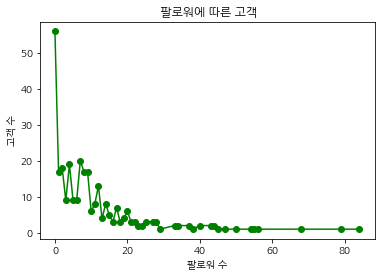

In [29]:
plt.plot(follow,num,color='green',marker='o',linestyle='solid')
plt.title(" 팔로워에 따른 고객")
plt.ylabel("고객 수")
plt.xlabel("팔로워 수")
plt.show()

In [30]:
a=train_data['팔로잉'].value_counts()
b=sorted(a.index)
a2=pd.Series(a,index=b)
follow=a2.index
num=a2.values
print(a2)

0     33
1     23
2     33
3     14
4     27
5     18
6     19
7     17
8     14
9      8
10    12
11    11
12     9
13     4
14     6
15     4
16     2
17     3
18     1
19     1
20     4
21     1
22     2
23     1
24     3
25     2
26     1
27     2
28     1
30     2
31     1
32     1
33     3
36     3
38     1
39     1
42     4
44     1
48     1
55     1
56     1
57     1
67     1
68     1
70     1
Name: 팔로잉, dtype: int64


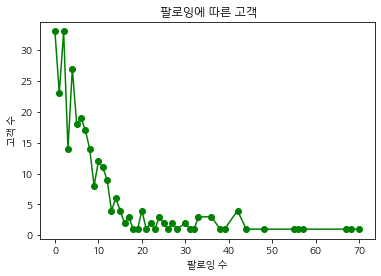

In [31]:
plt.plot(follow,num,color='green',marker='o',linestyle='solid')
plt.title(" 팔로잉에 따른 고객")
plt.ylabel("고객 수")
plt.xlabel("팔로잉 수")
plt.show()

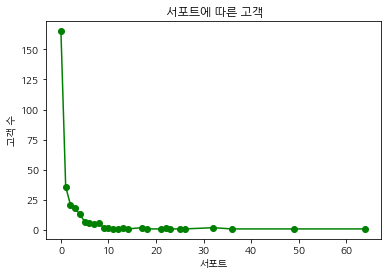

In [32]:
a=train_data['서포트'].value_counts()
b=sorted(a.index)
a2=pd.Series(a,index=b)
follow=a2.index
num=a2.values
plt.plot(follow,num,color='green',marker='o',linestyle='solid')
plt.title(" 서포트에 따른 고객")
plt.ylabel("고객 수")
plt.xlabel("서포트")
plt.show()

In [33]:
print(a2)

0     165
1      36
2      21
3      18
4      13
5       7
6       6
7       5
8       6
9       2
10      2
11      1
12      1
13      2
14      1
17      2
18      1
21      1
22      2
23      1
25      1
26      1
32      2
36      1
49      1
64      1
Name: 서포트, dtype: int64
